In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
#chargement des fichiers csv dans des dataframe pandas

ventes_data = pd.read_csv('ventes.csv')
ventes = ventes_data.copy()
produits = pd.read_csv('produits.csv')
clients = pd.read_csv('clients.csv')

In [5]:
# affichage des dataframe

def output():
    print('\n\n\n')
print(ventes.head())
output()
print(produits.head())
output()
print(clients.head())

  id_prod                        date session_id client_id
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242




  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0




  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943



We can drop session_id in sells and also transform the date into two columns :date itself and the dayTime ('day','morning','evening').

In [6]:
#Check if is there null values

ventes.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [7]:
date=[]
day=[]
print(ventes.head())

#Récuperer l'élément date puis le spliter en heur pour déterminer le moment de la journée (matin, apré midi et soir)

for i in range(len(ventes['date'])):
    temp = ventes['date'][i]
    temp = temp.split(' ')
    iter_date = temp[0].replace('test_', ' ')
    date.append(iter_date)
    hour = int(temp[1][0]+temp[1][1])
    if hour>=6 and hour<=12:
        day.append('morning')
    elif hour > 12 and hour <=18:
        day.append('day')
    elif (hour>18 and hour<=24) or (hour>=0 and hour <6):
        day.append('evening')
    else:
        print('Error')
output()


  id_prod                        date session_id client_id
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242






In [8]:
ventes['date'] = date
ventes['dayTime'] = day

In [9]:
#First of all we should get rid of duplicates

print(ventes.duplicated().sum())
ventes.drop_duplicates(inplace=True)
print(ventes.duplicated().sum())
ventes.head()

581
0


,id_prod,date,session_id,client_id,dayTime
0,0_1483,2021-04-10,s_18746,c_4450,day
1,2_226,2022-02-03,s_159142,c_277,evening
2,1_374,2021-09-23,s_94290,c_4270,day
3,0_2186,2021-10-17,s_105936,c_4597,evening
4,0_1351,2021-07-17,s_63642,c_1242,evening


In [10]:
#Cleaning data

produits.isna().sum()
print(produits.duplicated().sum())
produits.drop_duplicates(inplace=True)
print(produits.duplicated().sum())

0
0


In [11]:
#Cleaning data

clients.isna().sum()
print(clients.duplicated().sum())
clients.drop_duplicates(inplace=True)
print(clients.duplicated().sum())
age=[]
for i in range(len(clients['birth'])):
    age.append(2022-int(clients['birth'][i]))
clients['age']=age
clients.head()

0
0


,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


c:\Users\Sabri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


mean  21.85664131426833
std 29.843366864731806


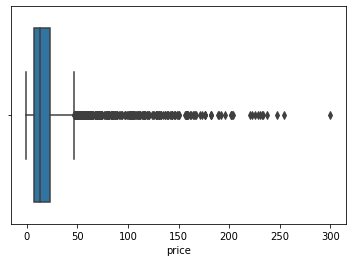

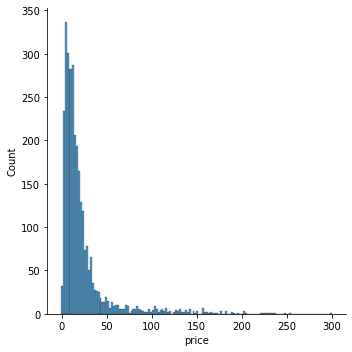

In [12]:
import seaborn as sns

sns.boxplot(produits['price'])
sns.displot(produits['price'])
print("mean ",np.mean(produits['price']))
print("std" ,np.std(produits['price']))

import matplotlib.pyplot as plt
import seaborn as sns
print(produits['price'].describe())
output()
sns.boxplot(produits['price'])
sns.displot(produits['price'])

c:\Users\Sabri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


mean  -7.025445364223686e-18
std 1.0


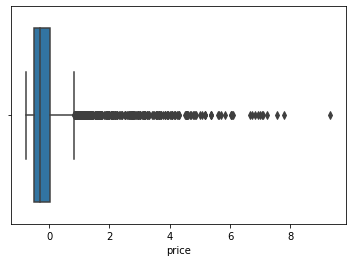

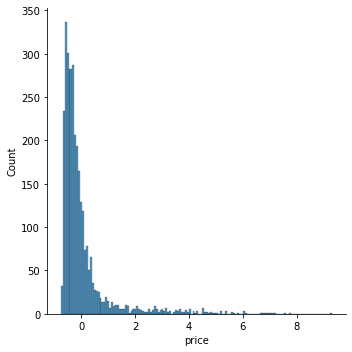

In [13]:

price=produits['price']
m=np.mean(price)
s=np.std(price)
price_z = (price-m)/s

sns.boxplot(price_z)
sns.displot(price_z)
print("mean ",np.mean(price_z))
print("std" ,np.std(price_z))

'''

Here we see that the distribution is not representative,let's standardalise it with z-score method
'''

c:\Users\Sabri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


mean  0.5497900821417707
std 1.8652104290457383


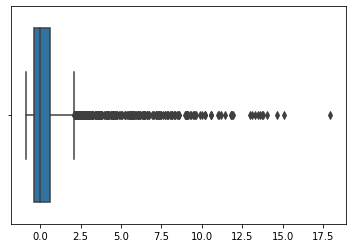

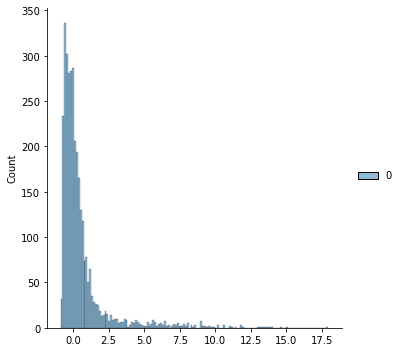

In [14]:

from sklearn.preprocessing import RobustScaler #interquartille

scaler = RobustScaler()
scaler.fit(produits['price'].values.reshape(-1,1))
price_z=scaler.transform(produits['price'].values.reshape(-1,1))
sns.boxplot(price_z)
sns.displot(price_z)
print("mean ",np.mean(price_z))
print("std" ,np.std(price_z))



Here we can see that it's still dispersed,so let's use another method



IQR value for column price is: 15.999999999999998
     id_prod  price  categ
0     0_1421  19.99      0
1     0_1368   5.13      0
2      0_731  17.99      0
3      1_587   4.99      1
4     0_1507   3.99      0
...      ...    ...    ...
3281   0_607  14.99      0
3283   0_146  17.14      0
3284   0_802  11.22      0
3285   1_140  38.56      1
3286  0_1920  25.16      0

[2985 rows x 3 columns]
we dropped this % of our dataset by filtering 9.18770915728628


c:\Users\Sabri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


             price        categ
count  2985.000000  2985.000000
mean     14.104365     0.231491
std       9.682157     0.433608
min      -1.000000     0.000000
25%       6.570000     0.000000
50%      11.990000     0.000000
75%      19.270000     0.000000
max      46.950000     2.000000


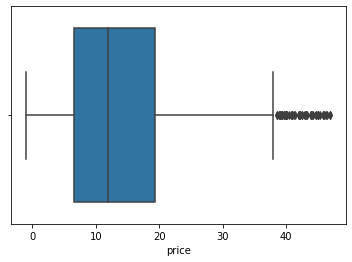

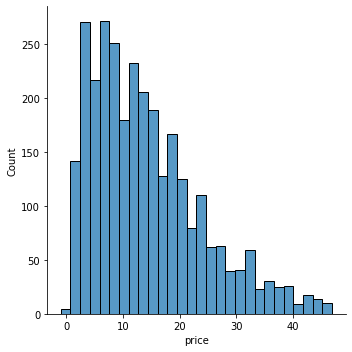

In [15]:


col='price'
Q3 = np.quantile(produits[col], 0.75)
Q1 = np.quantile(produits[col], 0.25)
IQR = Q3 - Q1

print("IQR value for column %s is: %s" % (col, IQR))


lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
outlier_free_list = [x for x in produits[col] if (
    (x > lower_range) & (x < upper_range))]
filtered_price = produits.loc[produits[col].isin(outlier_free_list)]
print(filtered_price)
sns.boxplot(filtered_price['price'])
sns.displot(filtered_price['price'])
print("we dropped this % of our dataset by filtering",(len(produits)-len(filtered_price))/len(produits)*100)
print(filtered_price.describe())


It seems we can nothing do here ,but drop the outliers

There are still some outliers

             price        categ
count  2909.000000  2909.000000
mean     13.371726     0.209350
std       8.657358     0.411954
min      -1.000000     0.000000
25%       6.250000     0.000000
50%      11.760000     0.000000
75%      18.990000     0.000000
max      37.990000     2.000000
we dropped this % of our dataset by filtering 11.499847885609979


c:\Users\Sabri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


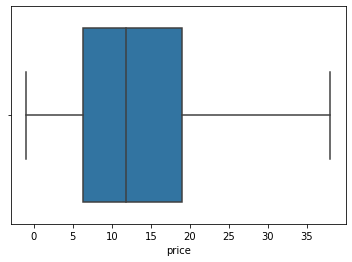

In [16]:


Q1 = filtered_price["price"].quantile(0.25)

Q3 = filtered_price["price"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

outlier_free_list = [x for x in produits[col] if (
    (x > Lower_Fence) & (x < Upper_Fence))]
filtered_price = produits.loc[produits[col].isin(outlier_free_list)]

print(filtered_price.describe())
sns.boxplot(filtered_price['price'])
print("we dropped this % of our dataset by filtering",(len(produits)-len(filtered_price))/len(produits)*100)

In [17]:
#Mission 2
def median(l):
    l.sort()
    if(len(l)%2==0):
        return (l[int((len(l)/2))-1]+l[int((len(l))/2)])/2
    else:
        return l[int((len(l))/2)]
mean_price=np.mean(np.mean(filtered_price['price']))
median_price=median(list(filtered_price['price']))
print('mean ',mean_price)
print('median',median_price)


dispersion_price=np.var(filtered_price['price'])
print('Our dispersion is ',dispersion_price)

mean  13.371725678927467
median 11.76
Our dispersion is  74.92408688109033


'''
Through boxplot we can see that the right side after mean is bigger than left side ,so mean is representative
Also we got rid of outliers 

'''

In [18]:
import matplotlib.pyplot as plt
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = len(arr)
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sum(sorted_arr)) - const_


In [19]:
gini_indicator=gini(list(filtered_price['price']))
print("gini_indicator of price is ",gini_indicator)


gini_indicator of price is  0.3608984848775434



We can see that there is not huge difference in inequality of prices


In [20]:
def lorenz_curve(X):
    X_lorenz = np.cumsum(X) / sum(X)
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='x', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

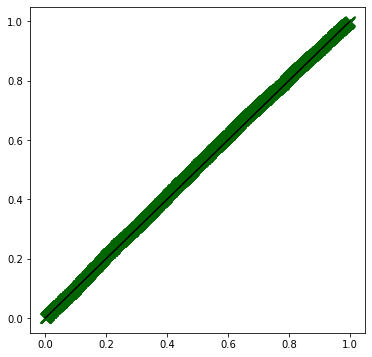

In [21]:
lorenz_curve(list(filtered_price['price']))


We can see that the bottom does not  hold the overall wealth. In fact ,according to that lane there is no inequality 

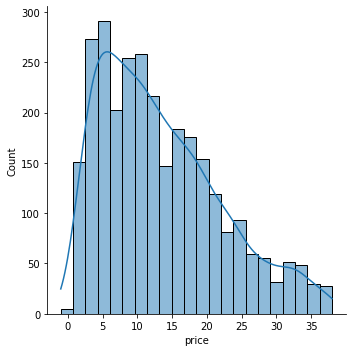

In [22]:
sns.displot(filtered_price['price'],kde=True)


We can see the positive skew here.
Which is good,because the big part of products worth less than another part

In [23]:
ventes2=ventes.copy()

Let's try to transform our date to years, month  and the  day of month  category .The last one will be represented as fisrt part of month till 15th and the rest as second part

In [24]:

ventes2.head()


,id_prod,date,session_id,client_id,dayTime
0,0_1483,2021-04-10,s_18746,c_4450,day
1,2_226,2022-02-03,s_159142,c_277,evening
2,1_374,2021-09-23,s_94290,c_4270,day
3,0_2186,2021-10-17,s_105936,c_4597,evening
4,0_1351,2021-07-17,s_63642,c_1242,evening


In [25]:
parts_of_month=[]
years=[]
months=[]
l=list(ventes2['date'])
for i in range(len(l)):
    full_date=l[i]
    splited_date=full_date.split('-')
    years.append(int(splited_date[0]))
    months.append(int(splited_date[1]))
    if int(splited_date[2])>=15:
        parts_of_month.append('secondPartOfMonth')
    if int(splited_date[2])<15:
        parts_of_month.append('firstPartOfMonth')

ventes2['year']=years
ventes2['month']=months
ventes2['part_of_month']=parts_of_month

In [26]:
ventes2.head()

,id_prod,date,session_id,client_id,dayTime,year,month,part_of_month
0,0_1483,2021-04-10,s_18746,c_4450,day,2021,4,firstPartOfMonth
1,2_226,2022-02-03,s_159142,c_277,evening,2022,2,firstPartOfMonth
2,1_374,2021-09-23,s_94290,c_4270,day,2021,9,secondPartOfMonth
3,0_2186,2021-10-17,s_105936,c_4597,evening,2021,10,secondPartOfMonth
4,0_1351,2021-07-17,s_63642,c_1242,evening,2021,7,secondPartOfMonth


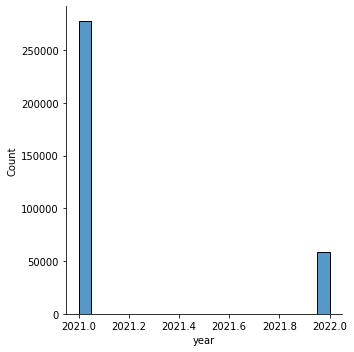

In [27]:
sns.displot(ventes2['year'])


We can see that most of sells had been done in 2021 according to data

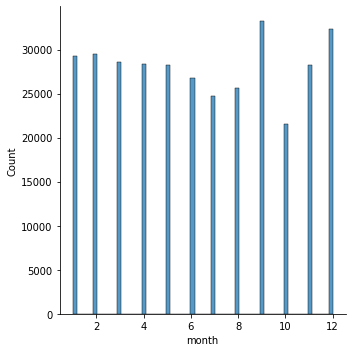

In [28]:
sns.displot(ventes2['month'])


We can see that the most populars month are september and december.It depends on product that we sell,maybe it's a suitable product for the begining of study or it is good product as present for the New Year


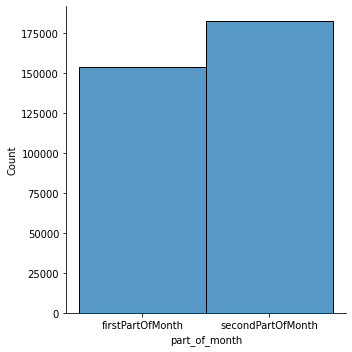

In [29]:
sns.displot(ventes2['part_of_month'])

Most of the time it's secondPartOfMonth.It's logical because people receive their salary in the end of month

In [30]:
general_data=ventes2.copy()
general_data=pd.merge(general_data,clients)
general_data=pd.merge(general_data,filtered_price)
general_data.head()

,id_prod,date,session_id,client_id,dayTime,year,month,part_of_month,sex,birth,age,price,categ
0,0_1483,2021-04-10,s_18746,c_4450,day,2021,4,firstPartOfMonth,f,1977,45,4.99,0
1,0_1483,2021-12-27,s_140787,c_5433,morning,2021,12,secondPartOfMonth,f,1981,41,4.99,0
2,0_1483,2021-10-27,s_110736,c_857,evening,2021,10,secondPartOfMonth,m,1985,37,4.99,0
3,0_1483,2021-07-04,s_57626,c_3679,morning,2021,7,firstPartOfMonth,f,1989,33,4.99,0
4,0_1483,2021-09-19,s_92165,c_1609,morning,2021,9,secondPartOfMonth,m,1980,42,4.99,0


<AxesSubplot:xlabel='month', ylabel='price'>

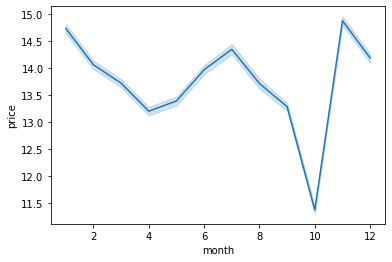

In [31]:
sns.lineplot(x=general_data['month'],y=general_data['price'])


Here we can see that in October we have the lowest rate of product price 

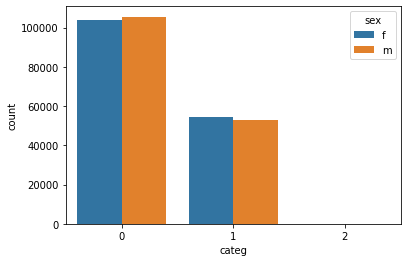

In [32]:
sns.countplot(x = "categ", hue ="sex", data = general_data);

We see that the product 1 and 2 are unisex

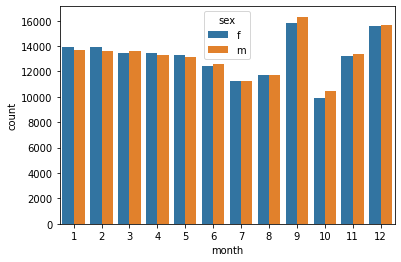

In [33]:
sns.countplot(x = "month", hue ="sex", data = general_data);

We can see the rate of sells by month according to sex

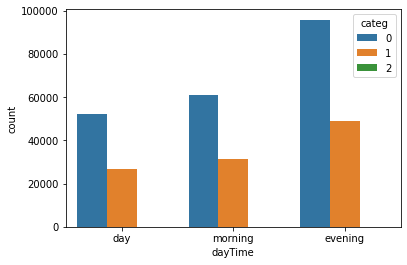

In [34]:
sns.countplot(x = "dayTime", hue ="categ", data = general_data);

We can see that the most of sells had been done in evening also the most popular category of product is 0

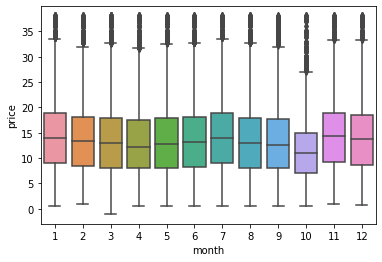

In [35]:
sns.boxplot(x = "month", y = "price", data = general_data);

As we said previously on October we have the lowest rate of product price ,but also the huge amount of outliers in this month

In [36]:
#Mission 3
'''

1)As we have seen previously in the countplot of category accoring to sex that there is no relation between the sex and the category of products and most of the products seem to be unisex
'''

'\n\n1)As we have seen previously in the countplot of category accoring to sex that there is no relation between the sex and the category of products and most of the products seem to be unisex\n'

1.	Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
2.	Y a-t-il une corrélation entre l'âge des clients et :

o	Le montant total des achats ;
o	La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
o	La taille du panier moyen (en nombre d’articles) ;
o	Les catégories de produits achetés.


<AxesSubplot:xlabel='age', ylabel='price'>

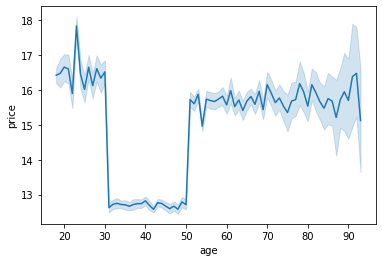

In [37]:
#2)
sns.lineplot(x=general_data['age'],y=general_data['price'])

We see here that most expensive sells had been done for 21-25 ages,the less expensive for 30-50 ages.
Also it's impressing that the people after 50 have average sells for their prodcuts.It seems that after pension there is a second life .

<AxesSubplot:xlabel='month', ylabel='price'>

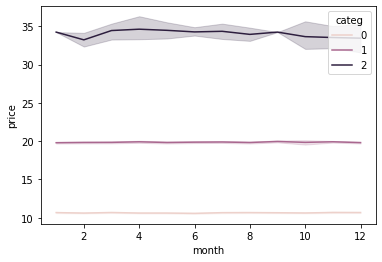

In [38]:
sns.lineplot(x=general_data['month'],y=general_data['price'],hue=general_data['categ'])

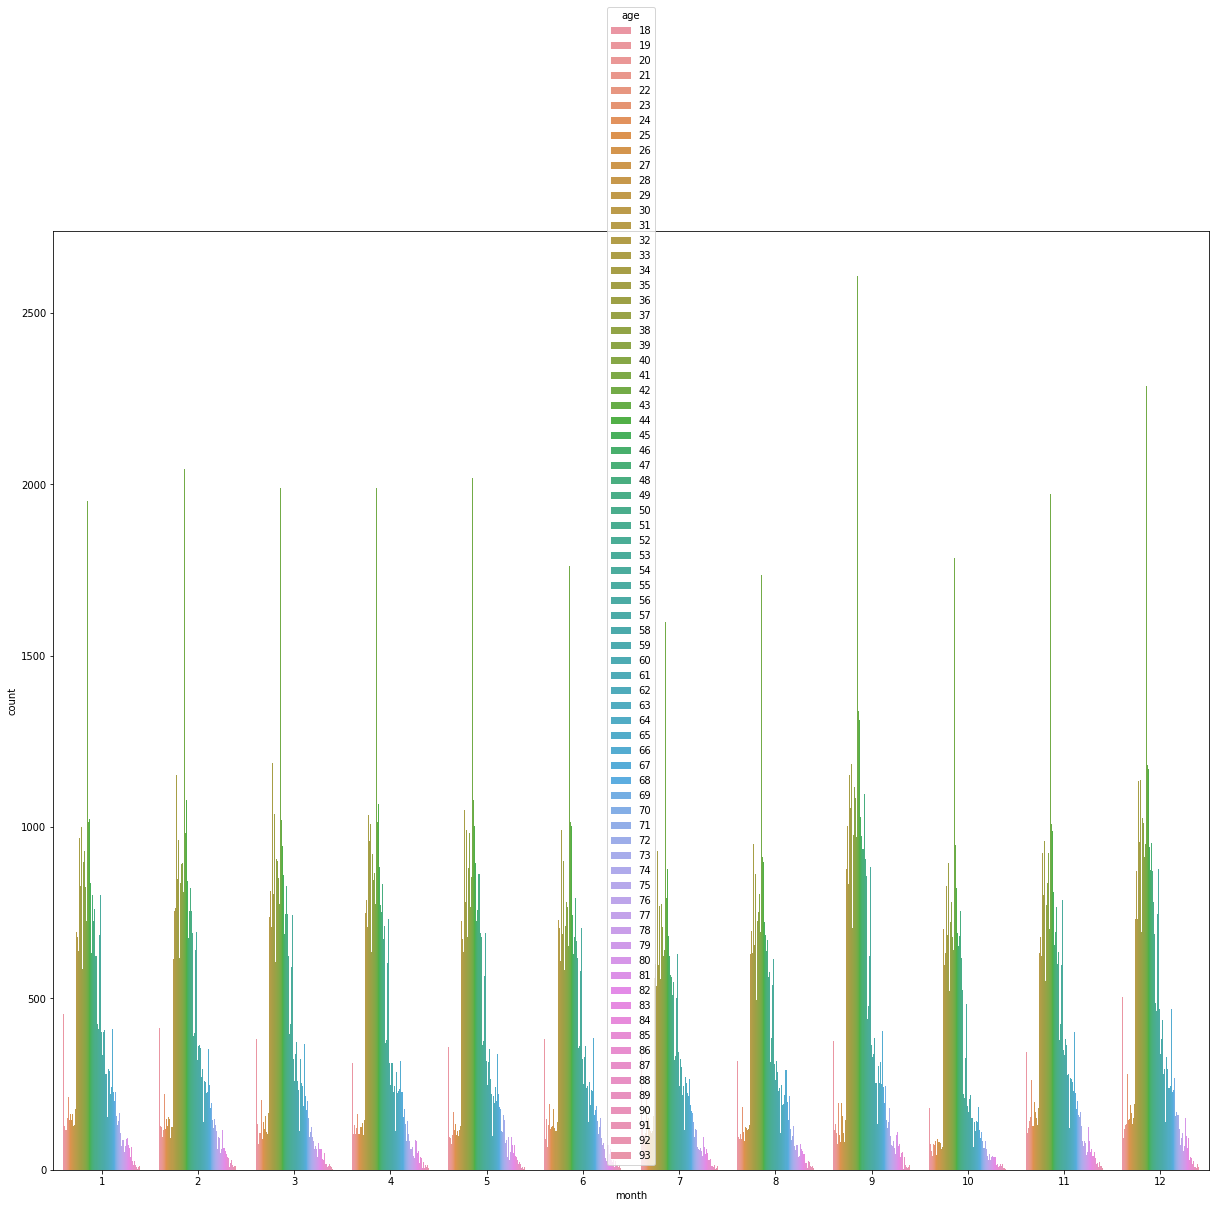

In [39]:
a4_dims = (20.7, 17.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.countplot(x = "month", hue ="age", data = general_data,ax=ax);

It's not representetive,I will add the categ_age columns for 5 values :25,35,45,55,65 to well plot it

In [40]:
categ_age=[]
age_l=list(general_data['age'])
for i in range(len(age_l)):
    if age_l[i]<=25:
        categ_age.append(25)
    elif age_l[i]>25 and age_l[i]<=35:
        categ_age.append(35)
    elif age_l[i]>35 and age_l[i]<=45:
        categ_age.append(45)
    elif age_l[i]>45 and age_l[i]<=55:
        categ_age.append(55)
    else:
        categ_age.append(65)

general_data['categ_age']=categ_age


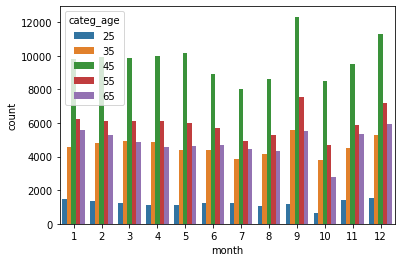

In [41]:
sns.countplot(x = "month", hue ="categ_age", data = general_data);

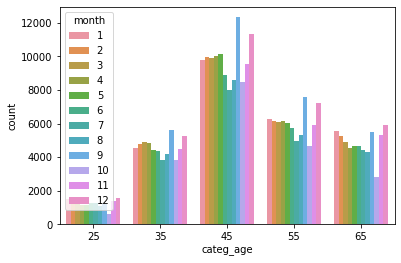

In [42]:
sns.countplot(x = "categ_age", hue ="month", data = general_data);

As wee see the most of people who do sells are under category 45